In [1]:
import pandas as pd
import numpy as np

In [2]:
cols = list(pd.read_csv('diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'))
feats_to_not_consider = ['CholCheck', 'AnyHealthcare','MentHlth', 'PhysHlth', 'NoDocbcCost']

df = pd.read_csv('diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 
                 usecols=[col for col in cols if col not in feats_to_not_consider])

df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,8.0,5.0,8.0


In [24]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

tv_X, test_X, tv_y, test_y = train_test_split(X, y, test_size=0.10, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(tv_X, tv_y, test_size=0.20, random_state=42)

print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(50897, 16) (50897,) (12725, 16) (12725,) (7070, 16) (7070,)


In [4]:
import tensorflow as tf
from tensorflow import keras

num_classes = 2
train_y = keras.utils.to_categorical(train_y, num_classes)
val_y = keras.utils.to_categorical(val_y, num_classes)

tf.random.set_random_seed(42)

In [5]:
def DNN(unit):
    """Creates DNN architecture"""
    model = tf.keras.Sequential()
    # Dense all to all
    model.add(tf.keras.layers.Dense(unit, input_shape = [16], activation = 'relu'))
    model.add(tf.keras.layers.Dense(unit, activation = 'relu'))
    model.add(tf.keras.layers.Dense(unit, activation = 'relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    #soft max
    model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))
    print("created DNN \n")
    
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam())
    print("compiled DNN \n")
    
    return model

DNN = DNN(18)
history = DNN.fit(train_X, train_y, epochs=50, batch_size=32, verbose=1, validation_data=(val_X, val_y))
score = DNN.evaluate(val_X, val_y, verbose=1)

# print performance
print()
print('Test loss:', score)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
created DNN 

compiled DNN 

Train on 50897 samples, validate on 12725 samples
Epoch 1/50


2022-11-12 15:15:27.711309: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-11-12 15:15:27.741155: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9b4e5421a0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-12 15:15:27.741201: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


50897/50897 [==============================] - 2s 40us/sample - loss: 0.6315 - val_loss: 0.5420
Epoch 2/50
50897/50897 [==============================] - 2s 31us/sample - loss: 0.5541 - val_loss: 0.5254
Epoch 3/50
50897/50897 [==============================] - 2s 31us/sample - loss: 0.5476 - val_loss: 0.5348
Epoch 4/50
50897/50897 [==============================] - 2s 32us/sample - loss: 0.5426 - val_loss: 0.5198
Epoch 5/50
50897/50897 [==============================] - 2s 31us/sample - loss: 0.5394 - val_loss: 0.5206
Epoch 6/50
50897/50897 [==============================] - 2s 32us/sample - loss: 0.5365 - val_loss: 0.5160
Epoch 7/50
50897/50897 [==============================] - 2s 32us/sample - loss: 0.5327 - val_loss: 0.5149
Epoch 8/50
50897/50897 [==============================] - 2s 32us/sample - loss: 0.5325 - val_loss: 0.5136
Epoch 9/50
50897/50897 [==============================] - 2s 33us/sample - loss: 0.5317 - val_loss: 0.5145
Epoch 10/50
50897/50897 [=======================

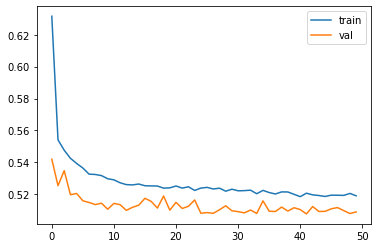

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

In [7]:
predictions = DNN.predict(test_X)
predictions.shape

(7070, 2)

In [8]:
pred_probs = pd.DataFrame(predictions, columns = ['0', '1'])
pred_probs.tail()

,0,1
7065,0.853305,0.146695
7066,0.904340,0.095660
7067,0.260264,0.739736
7068,0.648057,0.351943
7069,0.606735,0.393265


In [9]:
test_X.reset_index(inplace=True, drop=True)
test_y.reset_index(inplace=True, drop=True)

class_preds = np.argmax(predictions, axis=1)
classes = pd.DataFrame(class_preds, columns = ["Predicted Class"])

final_preds = pd.concat([test_X, pred_probs, classes, test_y], axis=1, ignore_index=False)
final_preds.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Sex,Age,Education,Income,0,1,Predicted Class,Diabetes_binary
0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,10.0,4.0,5.0,0.469752,0.530248,1,1.0
1,0.0,0.0,33.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0,0.373263,0.626737,1,0.0
2,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,8.0,6.0,6.0,0.476865,0.523135,1,0.0
3,0.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,7.0,5.0,8.0,0.496316,0.503684,1,0.0
4,1.0,0.0,47.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,1.0,1.0,6.0,6.0,3.0,0.302580,0.697420,1,1.0


In [10]:
from sklearn.metrics import confusion_matrix
y_true = final_preds['Diabetes_binary']
y_pred = final_preds['Predicted Class']
matrix = confusion_matrix(y_true, y_pred, normalize='true')

Text(0.5, 1.0, 'Confusion Matrix')

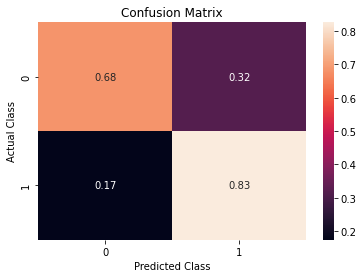

In [11]:
import seaborn as sns
fig = plt.figure()
sns.heatmap(matrix, annot=True)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')

In [12]:
final_preds[final_preds['Predicted Class'] != final_preds['Diabetes_binary']]

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Sex,Age,Education,Income,0,1,Predicted Class,Diabetes_binary
1,0.0,0.0,33.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0,0.373263,0.626737,1,0.0
2,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,8.0,6.0,6.0,0.476865,0.523135,1,0.0
3,0.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,7.0,5.0,8.0,0.496316,0.503684,1,0.0
5,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,6.0,6.0,4.0,0.374839,0.625161,1,0.0
16,0.0,1.0,37.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,9.0,5.0,5.0,0.319927,0.680073,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7060,1.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,10.0,4.0,8.0,0.755094,0.244906,0,1.0
7065,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,4.0,5.0,8.0,0.853305,0.146695,0,1.0
7067,1.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,9.0,6.0,5.0,0.260264,0.739736,1,0.0
7068,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,12.0,4.0,4.0,0.648057,0.351943,0,1.0


In [13]:
final_preds.columns

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', '0', '1',
       'Predicted Class', 'Diabetes_binary'],
      dtype='object')

In [14]:
wrongs = final_preds[(final_preds['Predicted Class'] != final_preds['Diabetes_binary'])]
wrongs

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Sex,Age,Education,Income,0,1,Predicted Class,Diabetes_binary
1,0.0,0.0,33.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0,0.373263,0.626737,1,0.0
2,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,8.0,6.0,6.0,0.476865,0.523135,1,0.0
3,0.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,7.0,5.0,8.0,0.496316,0.503684,1,0.0
5,1.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,6.0,6.0,4.0,0.374839,0.625161,1,0.0
16,0.0,1.0,37.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,9.0,5.0,5.0,0.319927,0.680073,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7060,1.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,10.0,4.0,8.0,0.755094,0.244906,0,1.0
7065,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,4.0,5.0,8.0,0.853305,0.146695,0,1.0
7067,1.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,9.0,6.0,5.0,0.260264,0.739736,1,0.0
7068,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,12.0,4.0,4.0,0.648057,0.351943,0,1.0


In [15]:
wrongs[(final_preds['0'] > .45) & (final_preds['0'] < .55)]

/Users/ryanznie/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Sex,Age,Education,Income,0,1,Predicted Class,Diabetes_binary
2,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,8.0,6.0,6.0,0.476865,0.523135,1,0.0
3,0.0,1.0,29.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,7.0,5.0,8.0,0.496316,0.503684,1,0.0
30,0.0,1.0,38.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,5.0,6.0,8.0,0.543827,0.456173,0,1.0
32,1.0,0.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0,0.472652,0.527348,1,0.0
75,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,10.0,5.0,5.0,0.509382,0.490618,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,11.0,5.0,6.0,0.475085,0.524915,1,0.0
6980,0.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,0.0,5.0,5.0,4.0,0.504800,0.495199,0,1.0
7019,1.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,13.0,4.0,5.0,0.462242,0.537758,1,0.0
7033,0.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,5.0,6.0,8.0,0.542747,0.457253,0,1.0


In [16]:
wrongs[(final_preds['0'] > .8)]

/Users/ryanznie/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Sex,Age,Education,Income,0,1,Predicted Class,Diabetes_binary
18,1.0,0.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,10.0,4.0,7.0,0.826013,0.173987,0,1.0
65,0.0,0.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,2.0,5.0,5.0,0.944948,0.055052,0,1.0
350,0.0,0.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,11.0,6.0,8.0,0.867777,0.132223,0,1.0
558,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,6.0,6.0,8.0,0.828412,0.171588,0,1.0
677,0.0,0.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,9.0,6.0,8.0,0.829256,0.170744,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6735,0.0,0.0,24.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,7.0,6.0,8.0,0.837639,0.162361,0,1.0
6902,0.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,6.0,6.0,8.0,0.818624,0.181376,0,1.0
6941,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,4.0,8.0,0.971965,0.028035,0,1.0
7025,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,3.0,4.0,8.0,0.947385,0.052615,0,1.0


In [17]:
wrongs[(final_preds['1'] > .8)]

/Users/ryanznie/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Sex,Age,Education,Income,0,1,Predicted Class,Diabetes_binary
19,1.0,1.0,31.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,1.0,1.0,10.0,4.0,3.0,0.150802,0.849198,1,0.0
91,1.0,0.0,43.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,10.0,5.0,5.0,0.181682,0.818318,1,0.0
117,1.0,1.0,27.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0,9.0,5.0,1.0,0.183120,0.816880,1,0.0
151,1.0,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,9.0,5.0,7.0,0.160674,0.839326,1,0.0
205,1.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0,10.0,6.0,8.0,0.159563,0.840437,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6753,0.0,1.0,31.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,5.0,1.0,0.0,8.0,4.0,2.0,0.186782,0.813218,1,0.0
6792,1.0,1.0,29.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,11.0,4.0,6.0,0.181279,0.818721,1,0.0
6846,1.0,1.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,11.0,4.0,4.0,0.183773,0.816227,1,0.0
6877,0.0,1.0,37.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,5.0,1.0,1.0,11.0,4.0,8.0,0.140648,0.859352,1,0.0


<Figure size 432x288 with 0 Axes>

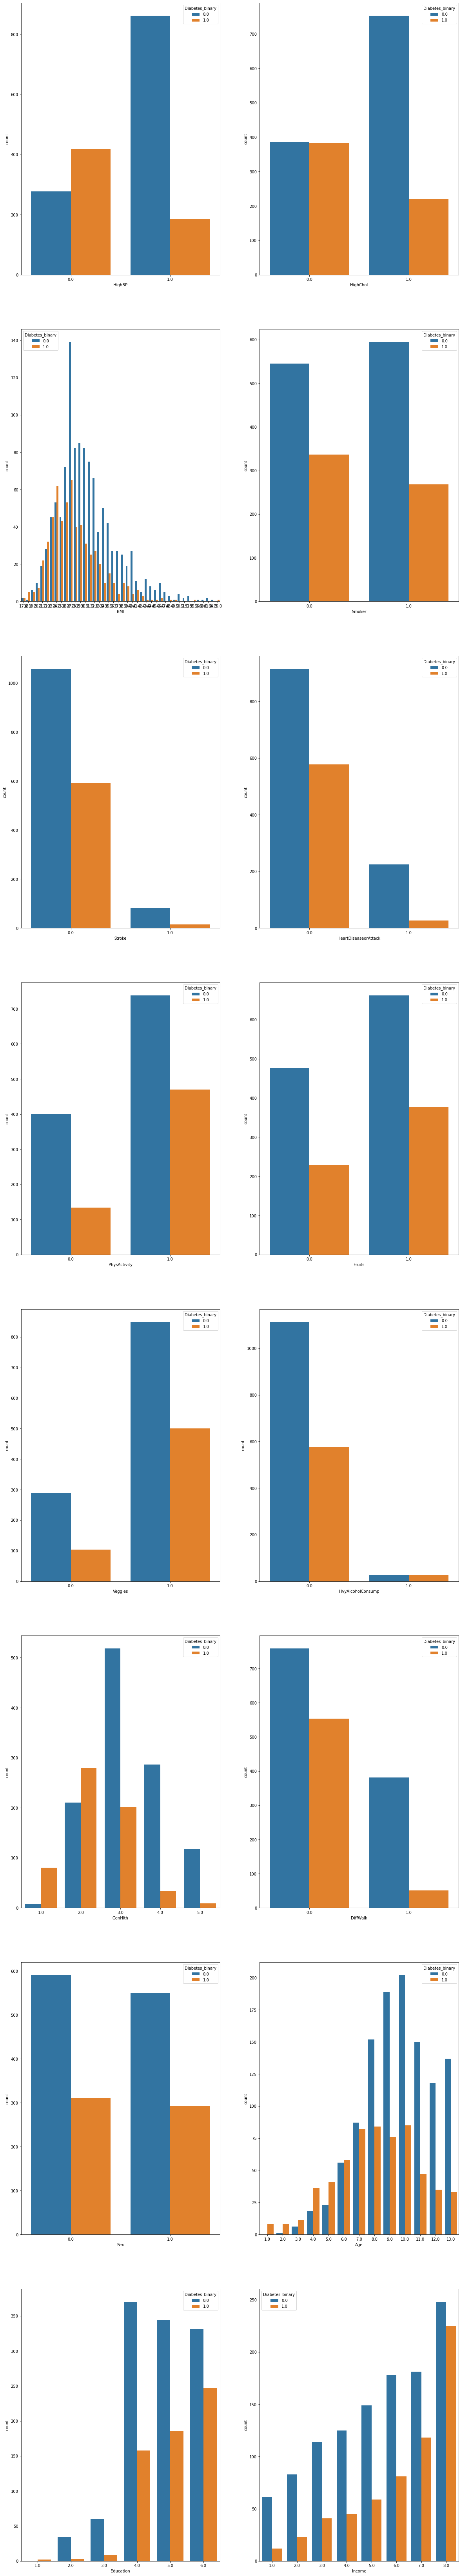

In [22]:
plt.figure()
fig, axes = plt.subplots(8, 2, figsize=(20, 120))

feats = iter(wrongs.columns.tolist()[:-4])

for i in range(8):
    for j in range(2):
        sns.countplot(ax=axes[i,j], x=next(feats), data = wrongs, hue='Diabetes_binary')

<Figure size 432x288 with 0 Axes>

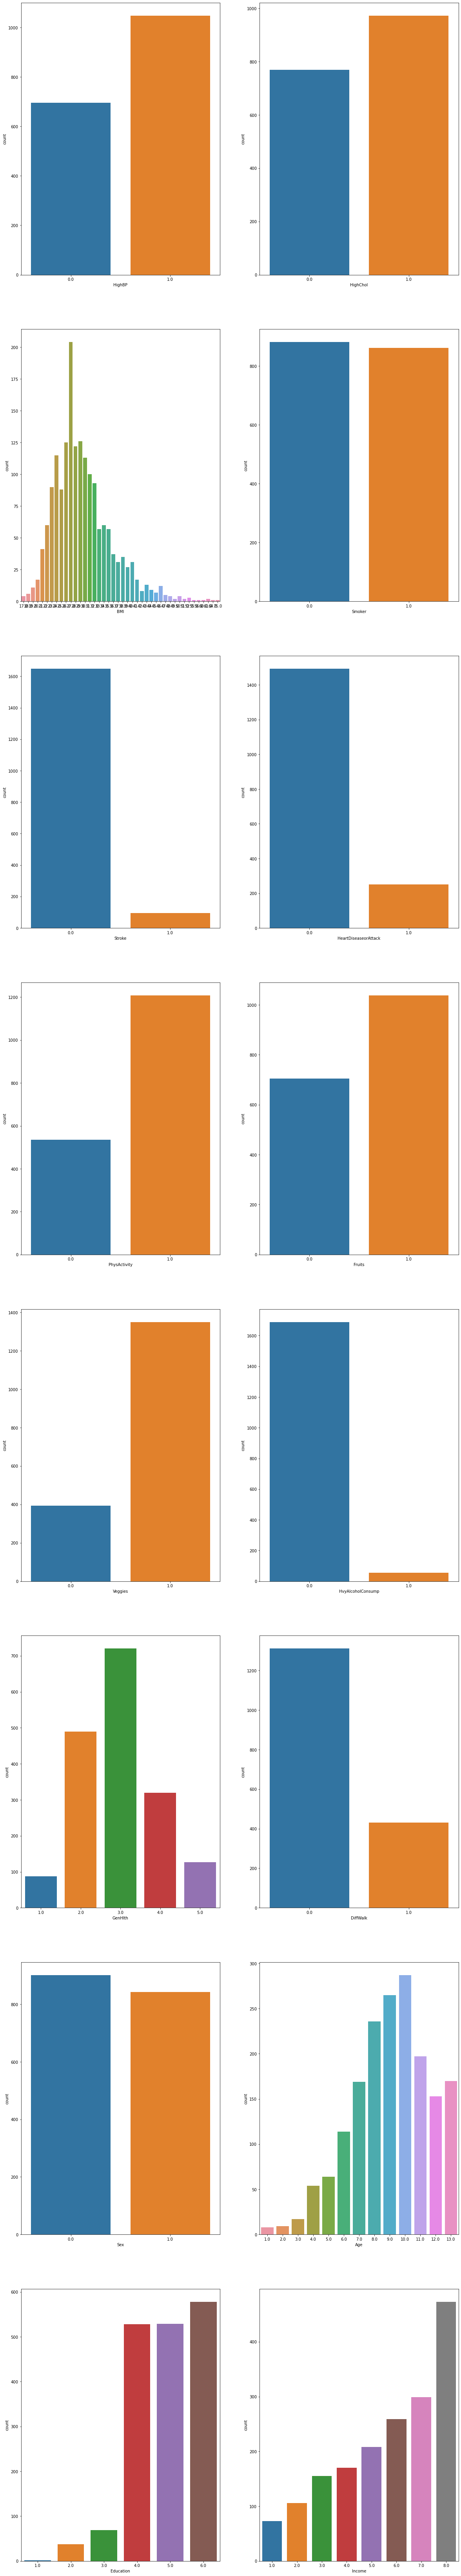

In [23]:
plt.figure()
fig, axes = plt.subplots(8, 2, figsize=(20, 120))

feats = iter(wrongs.columns.tolist()[:-4])

for i in range(8):
    for j in range(2):
        sns.countplot(ax=axes[i,j], x=next(feats), data = wrongs)